<a href="https://colab.research.google.com/github/rafacampos10/Classificacao_em_Machine_Learning/blob/main/Classificacao_em_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding e Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Escola DNC - Formação de Dados/Desafios/Desafio 6/Dataset/streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [ ]:
df['Time_on_platform'].fillna(0,inplace=True)
df['Num_streaming_services'].fillna(0,inplace=True)
df['Churned'].fillna(0,inplace=True)
df['Avg_rating'].fillna(0,inplace=True)
df['Devices_connected'].fillna(0,inplace=True)

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,0.0,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.dropna(subset=["Gender"],inplace=True)
df.dropna(subset=["Subscription_type"],inplace=True)
df.dropna(subset=["Age"],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
df['Churned'] = df['Churned'].replace(0, 'No')
df['Churned'] = df['Churned'].replace(1, 'Yes')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [ ]:
df = df.astype({"Age": 'int', "Time_on_platform": 'int',
                "Devices_connected": 'int', "Num_streaming_services": 'int',
                "Avg_rating": 'int'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#tipo de combustível
le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

#aspiration
le.fit(df.Subscription_type)
df.Subscription_type = le.transform(df.Subscription_type)

#numero de portas
le.fit(df.Churned)
df.Churned = le.transform(df.Churned)

#numero de portas
le.fit(df.User_id)
df.User_id = le.transform(df.User_id)

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,0,19499
1,69,0,6107,2,2,0,1,2,0,30498
2,44,1,6374,3,1,1,1,1,1,308
3,26,1,0,5,0,0,2,0,0,23377
5,54,1,3024,2,0,0,1,0,0,19436


In [ ]:
X = df.drop(columns=["User_id","Churned"], axis=1)

y = df[["Churned"]]

#X = df.iloc[:, :-1]
#y = df[["Churned"]]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
# Import the necessary sklearn method
#from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
#mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
#X = pd.DataFrame(mm.fit_transform(X))

## Regressão Logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churned = y_test).assign(label = lr.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churned,label
37613,49,0,1266,4,0,0,4,2,0,0
39244,37,0,0,3,0,2,1,3,1,0
62400,31,0,6081,2,0,0,1,1,0,0
24761,19,1,7290,0,2,0,3,0,0,0
56568,63,1,7148,0,2,0,5,4,1,0
...,...,...,...,...,...,...,...,...,...,...
66851,53,1,0,4,2,0,3,3,0,0
2781,51,0,0,4,2,0,2,4,1,0
35790,48,1,3599,5,0,0,3,0,0,0
65848,51,0,8504,0,2,0,5,2,0,0


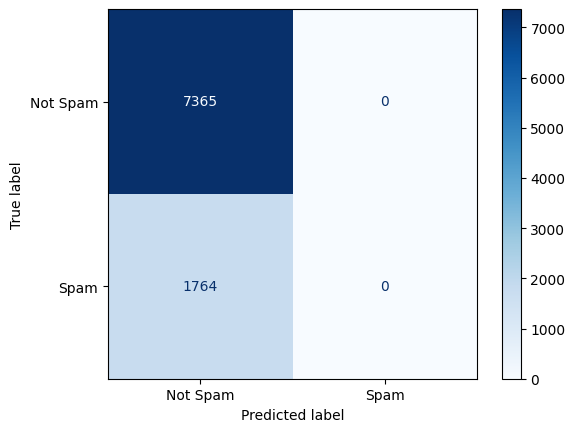

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    lr.predict(X_test),
    display_labels=['Not Spam', 'Spam'],
    cmap=plt.cm.Blues
)

In [ ]:
predict = lr.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8067625794201416
Acurácia (Teste): 0.8067696352283931
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.495511644706966
ROCAUC (Teste): 0.5074498185787101


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

<ipython-input-260-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
37613,49,0,1266,4,0,0,4,2,0,0
39244,37,0,0,3,0,2,1,3,1,0
62400,31,0,6081,2,0,0,1,1,0,0
24761,19,1,7290,0,2,0,3,0,0,0
56568,63,1,7148,0,2,0,5,4,1,1
...,...,...,...,...,...,...,...,...,...,...
66851,53,1,0,4,2,0,3,3,0,0
2781,51,0,0,4,2,0,2,4,1,0
35790,48,1,3599,5,0,0,3,0,0,0
65848,51,0,8504,0,2,0,5,2,0,0


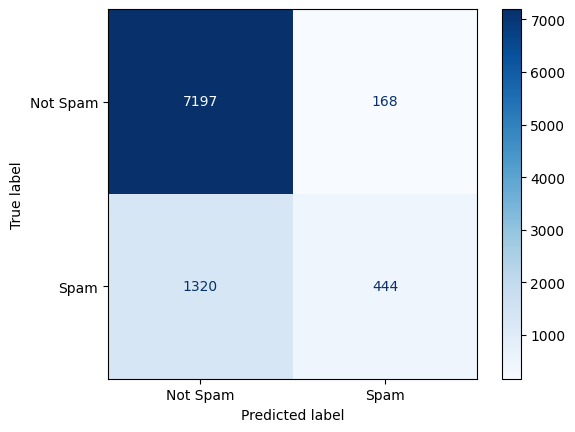

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf.predict(X_test),
    display_labels=['Not Spam', 'Spam'],
    cmap=plt.cm.Blues
)
#confusion_matrix(rf, X_test, y_test, values_format='d');

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9945227488497772
Acurácia (Teste): 0.8370029576076241
Acurácia Balanceada (Treino): 0.9884861757784593
Acurácia Balanceada (Teste): 0.6144450448203721
Precision (Treino): 0.9929064417177914
Precision (Teste): 0.7254901960784313
Recall (Treino): 0.9786470143613001
Recall (Teste): 0.25170068027210885
F1-Score (Treino): 0.9857251617814998
F1-Score (Teste): 0.37373737373737376
ROCAUC (Treino): 0.9997881483643617
ROCAUC (Teste): 0.6816320757766786


## Modelo Tunning

In [ ]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
dict = grid_search.best_estimator_.get_params()

dict

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 100, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10)

In [ ]:
rf_tunned.fit(X_train, y_train)

<ipython-input-269-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
37613,49,0,1266,4,0,0,4,2,0,0
39244,37,0,0,3,0,2,1,3,1,0
62400,31,0,6081,2,0,0,1,1,0,0
24761,19,1,7290,0,2,0,3,0,0,0
56568,63,1,7148,0,2,0,5,4,1,0
...,...,...,...,...,...,...,...,...,...,...
66851,53,1,0,4,2,0,3,3,0,0
2781,51,0,0,4,2,0,2,4,1,0
35790,48,1,3599,5,0,0,3,0,0,0
65848,51,0,8504,0,2,0,5,2,0,0


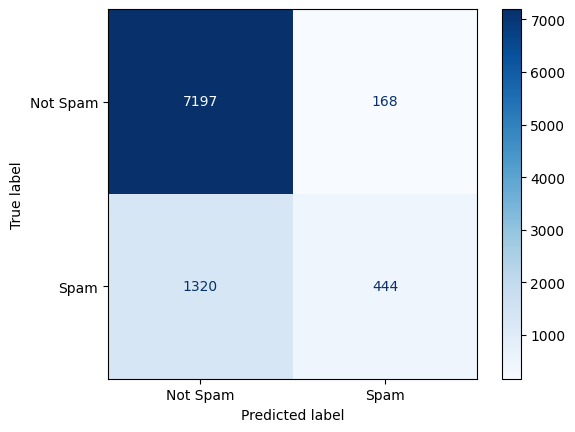

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf.predict(X_test),
    display_labels=['Not Spam', 'Spam'],
    cmap=plt.cm.Blues
)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8082596947345358
Acurácia (Teste): 0.8068791762515062
Acurácia Balanceada (Treino): 0.5038737717309146
Acurácia Balanceada (Teste): 0.5002834467120182
Precision (Treino): 1.0
Precision (Teste): 1.0
Recall (Treino): 0.007747543461829176
Recall (Teste): 0.0005668934240362812
F1-Score (Treino): 0.015375960997562346
F1-Score (Teste): 0.0011331444759206798
ROCAUC (Treino): 0.8847987154589464
ROCAUC (Teste): 0.590111462100115
